# Background

- 11-16-23 -- 11-17-23 updated LabView code to work with MCS2.
- This notebook is to look at the test rotation.

# Imports

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
#from copy import deepcopy
#import pickle as pkl
#from collections.abc import Iterable
from scipy.interpolate import interp1d
#from scipy.spatial.transform import Rotation
#import lmfit as lm
# from copy import deepcopy
#from dateutil import parser
# from plotly import graph_objects as go
# from plotly.offline import plot
import matplotlib.pyplot as plt
# from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

# local imports
# from plotting import config_plots, datetime_plt, get_label
from plotting import config_plots, get_label
from load_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d, scatter2d, histo, spherical_scatter3d
from mu2e.mu2eplots import mu2e_plot3d
# V vs. B, T (2021 results)
from V_vs_B_T import V_forward, inv_B_v2, invert_row, calc_B_column

config_plots()
# plt.rcParams.update({"text.usetex": True})

# Functions

In [5]:
def interp_temp_col(df_temp, df, col='NMR [T]'):
    interp_func = interp1d(df_temp.seconds_delta, df_temp[col].values, kind='linear', fill_value='extrapolate')
    df.loc[:, col] = interp_func(df.seconds_delta)
    return df

# Load

In [3]:
ddir = '/home/ckampa/Dropbox/LogFiles/monitoring/'
scanfile = ddir+'2023-11-17 144708.txt'
slowfile = ddir+'2023-11-17 144859slow.txt'

In [8]:
# temperature
df_temp = load_data(slowfile)
# only include times with NMR?
#df_temp = df_temp.query('`NMR [T]` > 0.9').copy()
# scan data
df = load_data(scanfile).iloc[1:]
# interpolations from temp to scan
for col in ['NMR [T]']:
    df = interp_temp_col(df_temp, df, col=col)
# time slices?
t0 = '2023-11-17 00:00'
tf = '2023-11-18 00:00'
df = df.query(f'"{t0}" <= Datetime <= "{tf}"').copy()
df_temp = df_temp.query(f'"{t0}" <= Datetime <= "{tf}"').copy()

# Plot

In [9]:
df

,Time,Magnet Current [A],Magnet Voltage [V],NMR [T],NMR [FFT],SmarAct_Pattern_Angle_1,SmarAct_Pattern_Angle_2,SmarAct_Meas_Angle_1,SmarAct_Meas_Rotation_Angle_1,SmarAct_Meas_Angle_2,SmarAct_Meas_Rotation_Angle_2,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,
2023-11-17 14:52:16,11/17/2023 2:52:16 PM,0.0,0.0,0.0,0.0,-7.0,-180.0,-7.000001,0.0,-180.000010,0.0,307.0,0.085278,0.003553
2023-11-17 14:52:25,11/17/2023 2:52:25 PM,0.0,0.0,0.0,0.0,-7.0,-135.0,-7.000001,0.0,-134.999998,0.0,316.0,0.087778,0.003657
2023-11-17 14:52:35,11/17/2023 2:52:35 PM,0.0,0.0,0.0,0.0,-7.0,-90.0,-7.000000,0.0,-89.999999,0.0,326.0,0.090556,0.003773
2023-11-17 14:52:44,11/17/2023 2:52:44 PM,0.0,0.0,0.0,0.0,-7.0,-45.0,-7.000000,0.0,-44.999993,0.0,335.0,0.093056,0.003877
2023-11-17 14:52:54,11/17/2023 2:52:54 PM,0.0,0.0,0.0,0.0,-7.0,0.0,-6.999998,0.0,0.000003,0.0,345.0,0.095833,0.003993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 15:27:56,11/17/2023 3:27:56 PM,0.0,0.0,0.0,0.0,7.0,0.0,7.000001,0.0,0.000001,0.0,2447.0,0.679722,0.028322
2023-11-17 15:28:06,11/17/2023 3:28:06 PM,0.0,0.0,0.0,0.0,7.0,45.0,6.999999,0.0,45.000004,0.0,2457.0,0.682500,0.028438
2023-11-17 15:28:15,11/17/2023 3:28:15 PM,0.0,0.0,0.0,0.0,7.0,90.0,7.000000,0.0,90.000002,0.0,2466.0,0.685000,0.028542


Text(0, 0.5, 'Axis 0 Measured Angle [deg]')

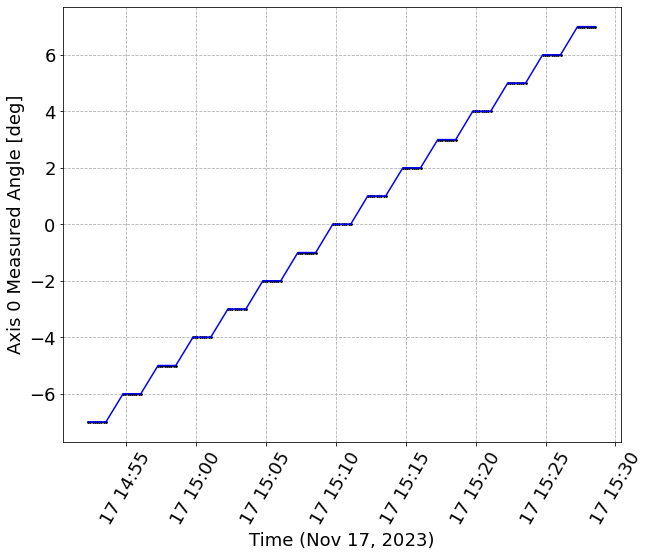

In [20]:
fig, ax = plt.subplots()

ax.scatter(df.index, df.SmarAct_Meas_Angle_1, s=3, c='black')
ax.plot(df.index, df.SmarAct_Meas_Angle_1, color='blue')

plt.xticks(rotation=60)

ax.set_xlabel('Time (Nov 17, 2023)')
ax.set_ylabel('Axis 0 Measured Angle [deg]')

Text(0, 0.5, 'Axis 1 Measured Angle [deg]')

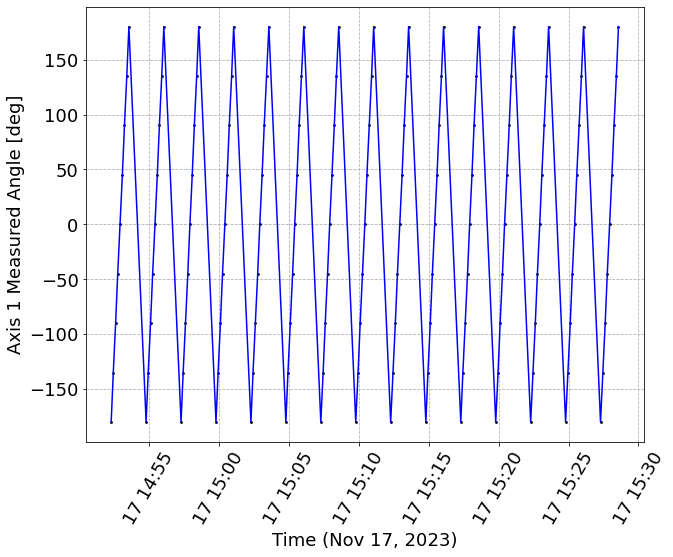

In [21]:
fig, ax = plt.subplots()

ax.scatter(df.index, df.SmarAct_Meas_Angle_2, s=3, c='black')
ax.plot(df.index, df.SmarAct_Meas_Angle_2, color='blue')

plt.xticks(rotation=60)

ax.set_xlabel('Time (Nov 17, 2023)')
ax.set_ylabel('Axis 1 Measured Angle [deg]')

Text(0, 0.5, 'Measured Angle [deg]')

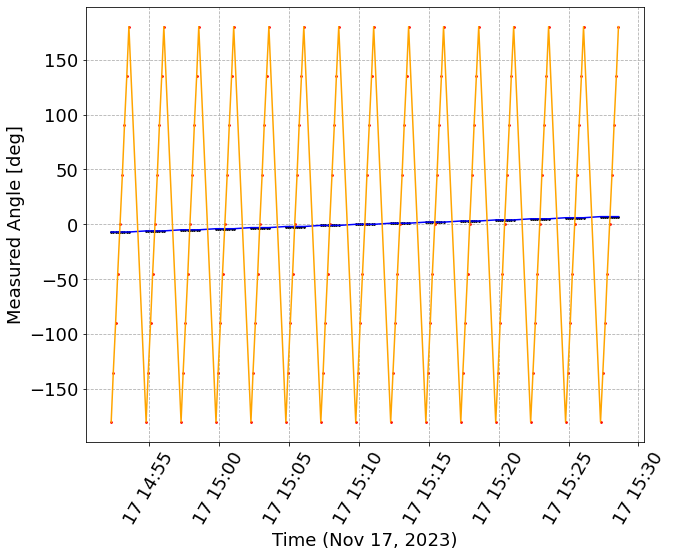

In [22]:
fig, ax = plt.subplots()

ax.scatter(df.index, df.SmarAct_Meas_Angle_1, s=3, c='black', label='Axis 0')
ax.plot(df.index, df.SmarAct_Meas_Angle_1, color='blue', label='Axis 0')

ax.scatter(df.index, df.SmarAct_Meas_Angle_2, s=3, c='red', label='Axis 1')
ax.plot(df.index, df.SmarAct_Meas_Angle_2, color='orange', label='Axis 1')

plt.xticks(rotation=60)

ax.set_xlabel('Time (Nov 17, 2023)')
ax.set_ylabel('Measured Angle [deg]')